In [19]:
import pandas as pd
from IPython.display import display

import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
train = pd.read_parquet("data/tidy/train.parquet")

# **Validação da base**

---

- Os minimos e máximos das variáveis fazem sentido?
- Quais colunas tem dados faltantes?
- Existem amostras duplicadas?


---
- Qual a nota das pessoas que faltaram nas provas ? 

    - TP_PRESENCA_CN
    - TP_PRESENCA_CH
    - TP_PRESENCA_LC
    - TP_PRESENCA_MT

In [21]:
tp_mapping = {"TP_PRESENCA_CN": "NU_NOTA_CN",
              "TP_PRESENCA_CH": "NU_NOTA_CH",
              "TP_PRESENCA_LC": "NU_NOTA_LC",
              "TP_PRESENCA_MT": "NU_NOTA_MT"}

# 0 significa faltou e 2 eliminado
for presence, nota in tp_mapping.items():
    aux = (train.query(f"{presence} == 0 | {presence} == 2")
                .loc[:,nota]
                .isna()
                .all())
    print(f"{presence}: {aux}")

TP_PRESENCA_CN: True
TP_PRESENCA_CH: True
TP_PRESENCA_LC: True
TP_PRESENCA_MT: True


--- 

- Qual a nota das pessoas que faltaram em 1 dia? 

    - TP_PRESENCA_CN
    - TP_PRESENCA_CH
    - TP_PRESENCA_LC
    - TP_PRESENCA_MT


O enem possuí dois dias de prova. No primeiro dia são aplicadas as provas de Linguagens, Códigos e suas Tecnologias ```TP_PRESENCA_LC```, Ciências Humanas e suas Tecnologias  (```TP_PRESENCA_CH```) e Redação. No segundo dia são aplicadas as provas de Ciências da Natureza e suas Tecnologias (```TP_PRESENCA_CN```) e Matemática e suas Tecnologias  (```TP_PRESENCA_MT```). Isto é, se faltou em um dia as notas daquele dia devem todas estarem zeradas.

In [22]:
day_mapping = {"DAY_ONE":(("TP_PRESENCA_LC", "TP_PRESENCA_CH"), ("NU_NOTA_LC", "NU_NOTA_CH", "NU_NOTA_REDACAO")),
               "DAY_TWO":(("TP_PRESENCA_CN", "TP_PRESENCA_MT"), ("NU_NOTA_CN", "NU_NOTA_MT"))}

for day, val in day_mapping.items():
    (presence1, presence2), (notas) = val
    aux = (train.query(f"({presence1} == 0 | {presence1} == 2) & ({presence2} == 2 | {presence2} == 0)")
                .loc[:,notas]
                .isna()
                .all())
    print(f"{day}:")
    print(f"{aux}\n")

DAY_ONE:
NU_NOTA_LC         True
NU_NOTA_CH         True
NU_NOTA_REDACAO    True
dtype: bool

DAY_TWO:
NU_NOTA_CN    True
NU_NOTA_MT    True
dtype: bool



# **Questões**
---
- Qual a distribuição das notas por sexo? 

    - TP_SEXO
    - NU_NOTA_MT
    


In [23]:
train.filter(regex="NU_NOTA").columns

Index(['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'NU_NOTA_REDACAO'],
      dtype='object')

In [24]:
notas_columns = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

temp = (train.reset_index()
             .melt(id_vars="TP_SEXO", value_vars=notas_columns, var_name="PROVAS", value_name="NOTA"))
temp.head()

,TP_SEXO,PROVAS,NOTA
0,F,NU_NOTA_CN,426.500000
1,F,NU_NOTA_CN,463.000000
2,M,NU_NOTA_CN,381.700012
3,M,NU_NOTA_CN,426.700012
4,M,NU_NOTA_CN,623.700012


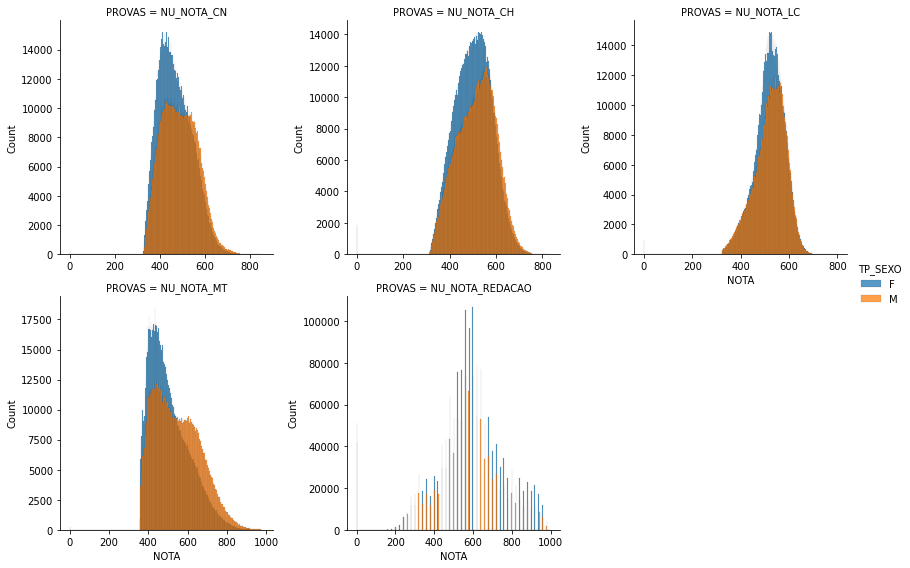

In [33]:
g = sns.FacetGrid(temp, col="PROVAS", hue="TP_SEXO", col_wrap=3, height=4, sharex=False, sharey=False)
g.map_dataframe(sns.histplot, x="NOTA")
g.add_legend()

---

- Qual a distribuição das notas por cor/raça? 

    - TP_COR_RACA

---

- Qual a distribuição das notas por estado civil? 

    - TP_ESTADO_CIVIL

---

- Ter alguma deficiência impacta na nota?

    - IN_BAIXA_VISAO 
    - IN_CEGUEIRA 
    - IN_SURDEZ 
    - IN_DEFICIENCIA_AUDITIVA 
    - IN_SURDO_CEGUEIRA
    - IN_DEFICIENCIA_FISICA
    - IN_DEFICIENCIA_MENTAL
    - IN_DEFICIT_ATENCAO
    - IN_DISLEXIA
    - IN_DISCALCULIA
    - IN_AUTISMO
    - IN_VISAO_MONOCULAR
    - IN_OUTRA_DEF
  

---    
- Existe diferença entre a nota dos jovens e idosos?

    - IN_IDOSO

---
- Existe diferença entre a nota das pessoas que precisam de recurso?

    - IN_SEM_RECURSO

---
- Como as seguintes variáveis estão relacionadas?

    - IN_CEGUEIRA 
    - IN_BRAILLE
    - IN_LIBRAS
    

---
    
- Alunos que fizeram a prova em sala particular performam melhor que o resto? 

    - IN_SALA_INDIVIDUAL

---
- Existe diferença entre as notas de quem escolheu inglês ou espanhol?

    - TP_LINGUA
    

---
- Analise as perguntas uma a uma. 